C:\Users\alber\AppData\Local\Temp\ipykernel_12184\3430209211.py:14: ParserWarning: Both a converter and dtype were specified for column meta - only the converter will be used.
  BB_Exp_df = pd.read_csv('BB_Radiation_Exp', dtype='float64', converters={'meta' : str})


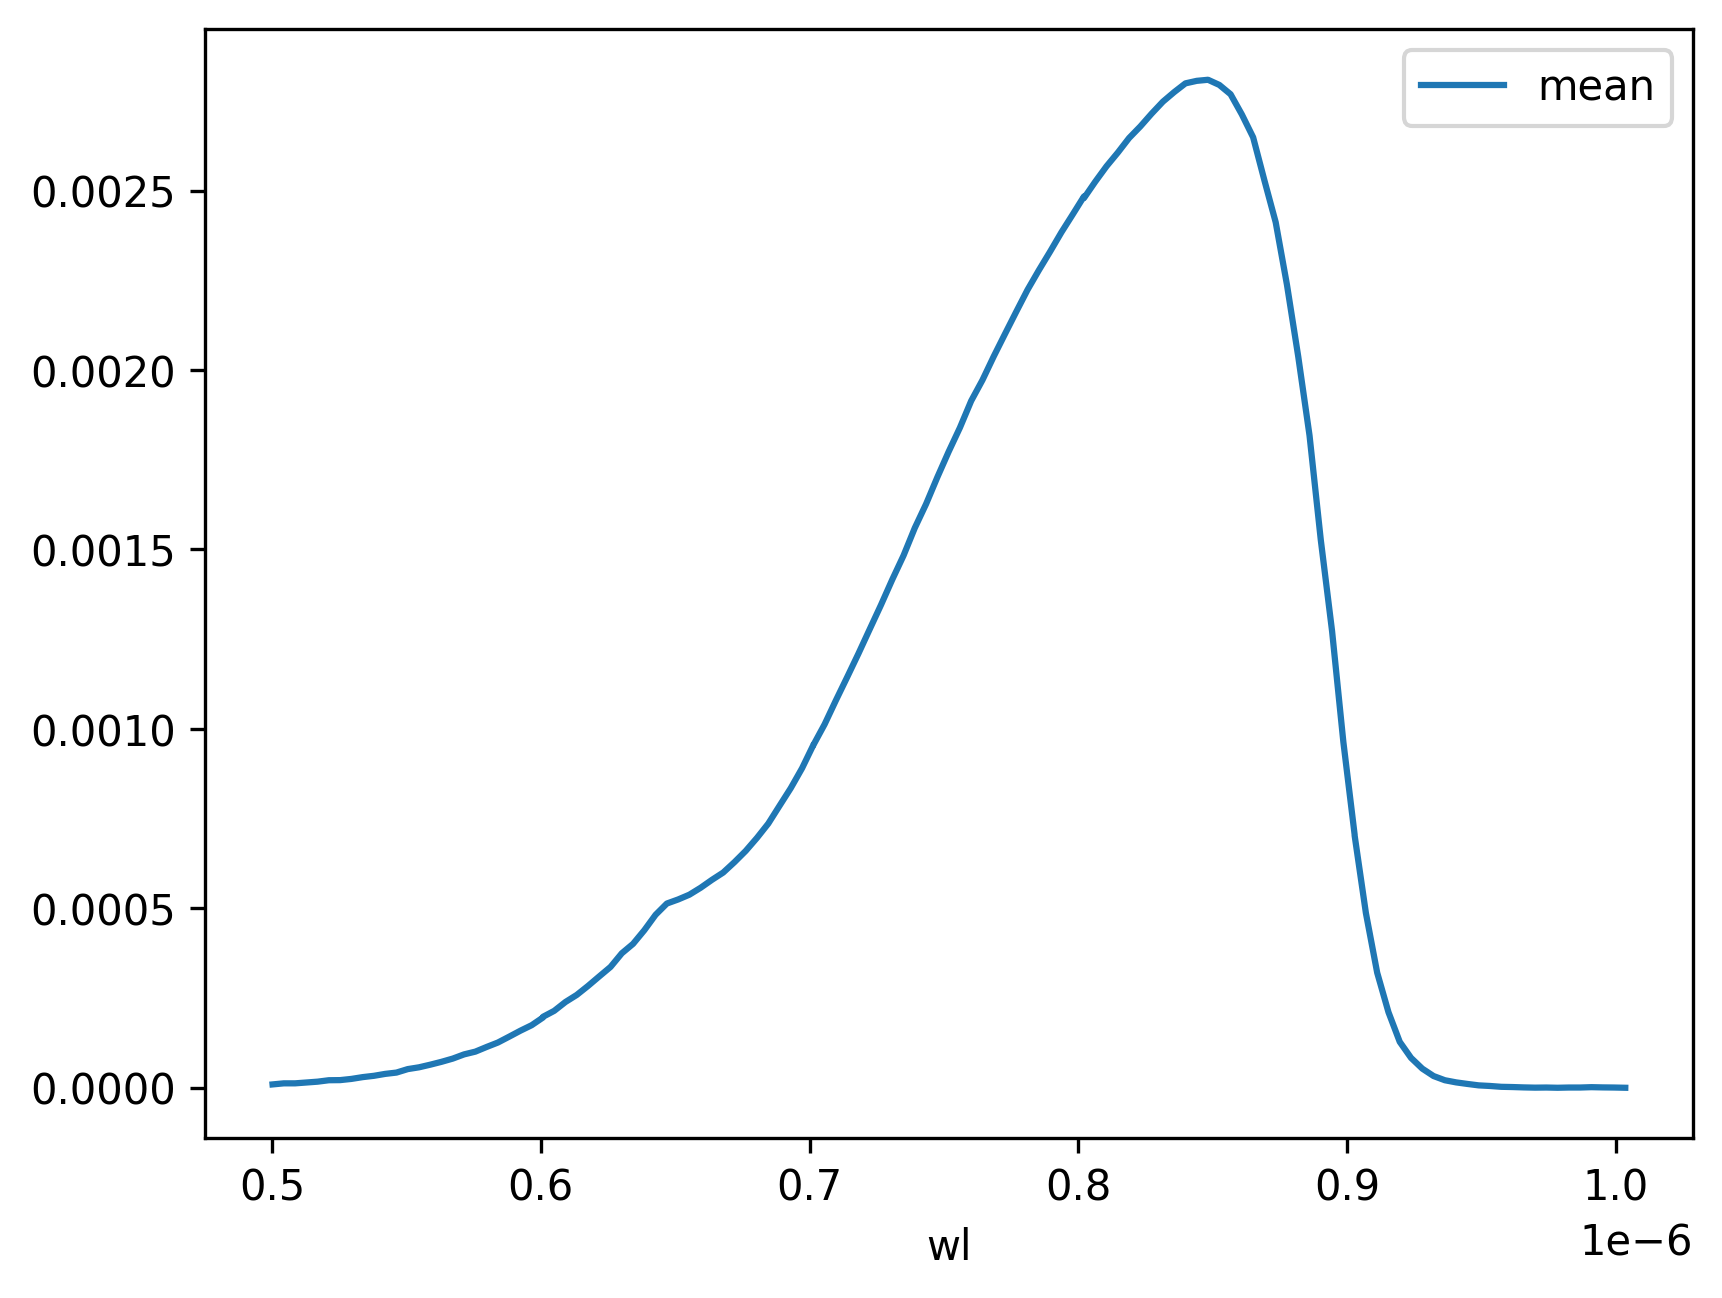

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import *
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from scipy.stats import linregress
from matplotlib import rcParams

rcParams["savefig.dpi"] = 300
rcParams["figure.dpi"] = 300

# Black Body dataframe
BB_Exp_df = pd.read_csv('BB_Radiation_Exp', dtype='float64', converters={'meta' : str})

# convert the wl in meters ! THIS IS IMPORANT
BB_Exp_df['wl'] = BB_Exp_df['wl'] * 1e-10
BB_Exp_df.plot('wl', 'mean')

# phyisical constants
h = 6.62607015e-34  # J / Hz
kb = 1.380649e-23   # J / K
c = 299792458       # m / s
hc = h * c

def plank(wl, T):
    '''
    Returns the Plank's law of radiadiation density
    by wavelenght.
    wl : the wavelentgh in meters
    T : temperature in K
    '''
    A = 2 * h * c ** 2
    print(f'wl type is {type(wl)}')
    
    expm1 = np.expm1(hc / (wl * kb * T))
    return A / (np.power(wl, 5) * expm1)

Fitting dei dati del laboratorio sul modello. In particolare si vuole trovare il coefficiente di proporzionalità tra dati e legge di Planck. Vengono usati tre intervalli diversi per fare il fit 

wl type is <class 'pandas.core.series.Series'>


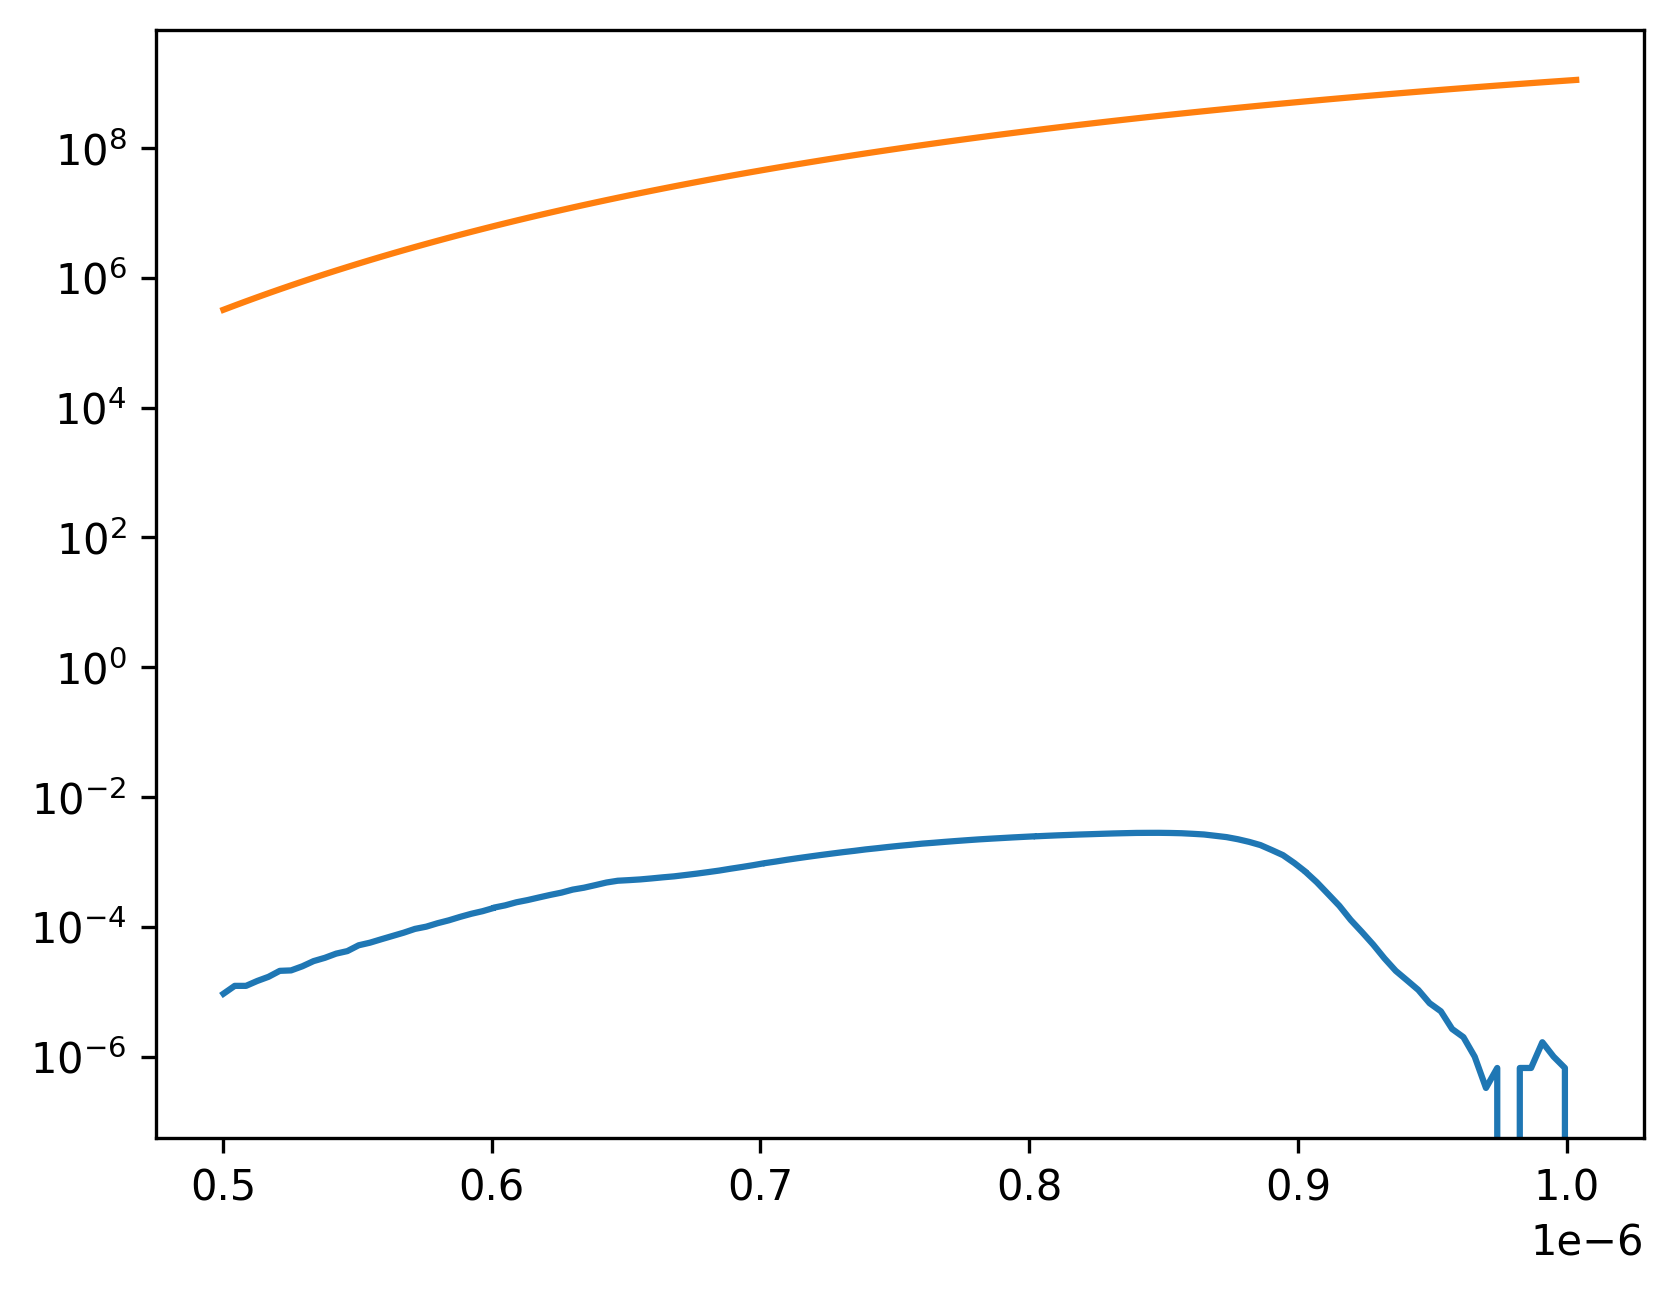

In [2]:
# extract the data so the fitting is easier
wl = BB_Exp_df['wl']
mean = BB_Exp_df['mean']
theo = plank(wl, 1240)

# plot in log scale to have a ref
fig, ax = plt.subplots()
ax.plot(wl, mean)
ax.plot(wl, theo)
ax.set_yscale('log')
plt.show()

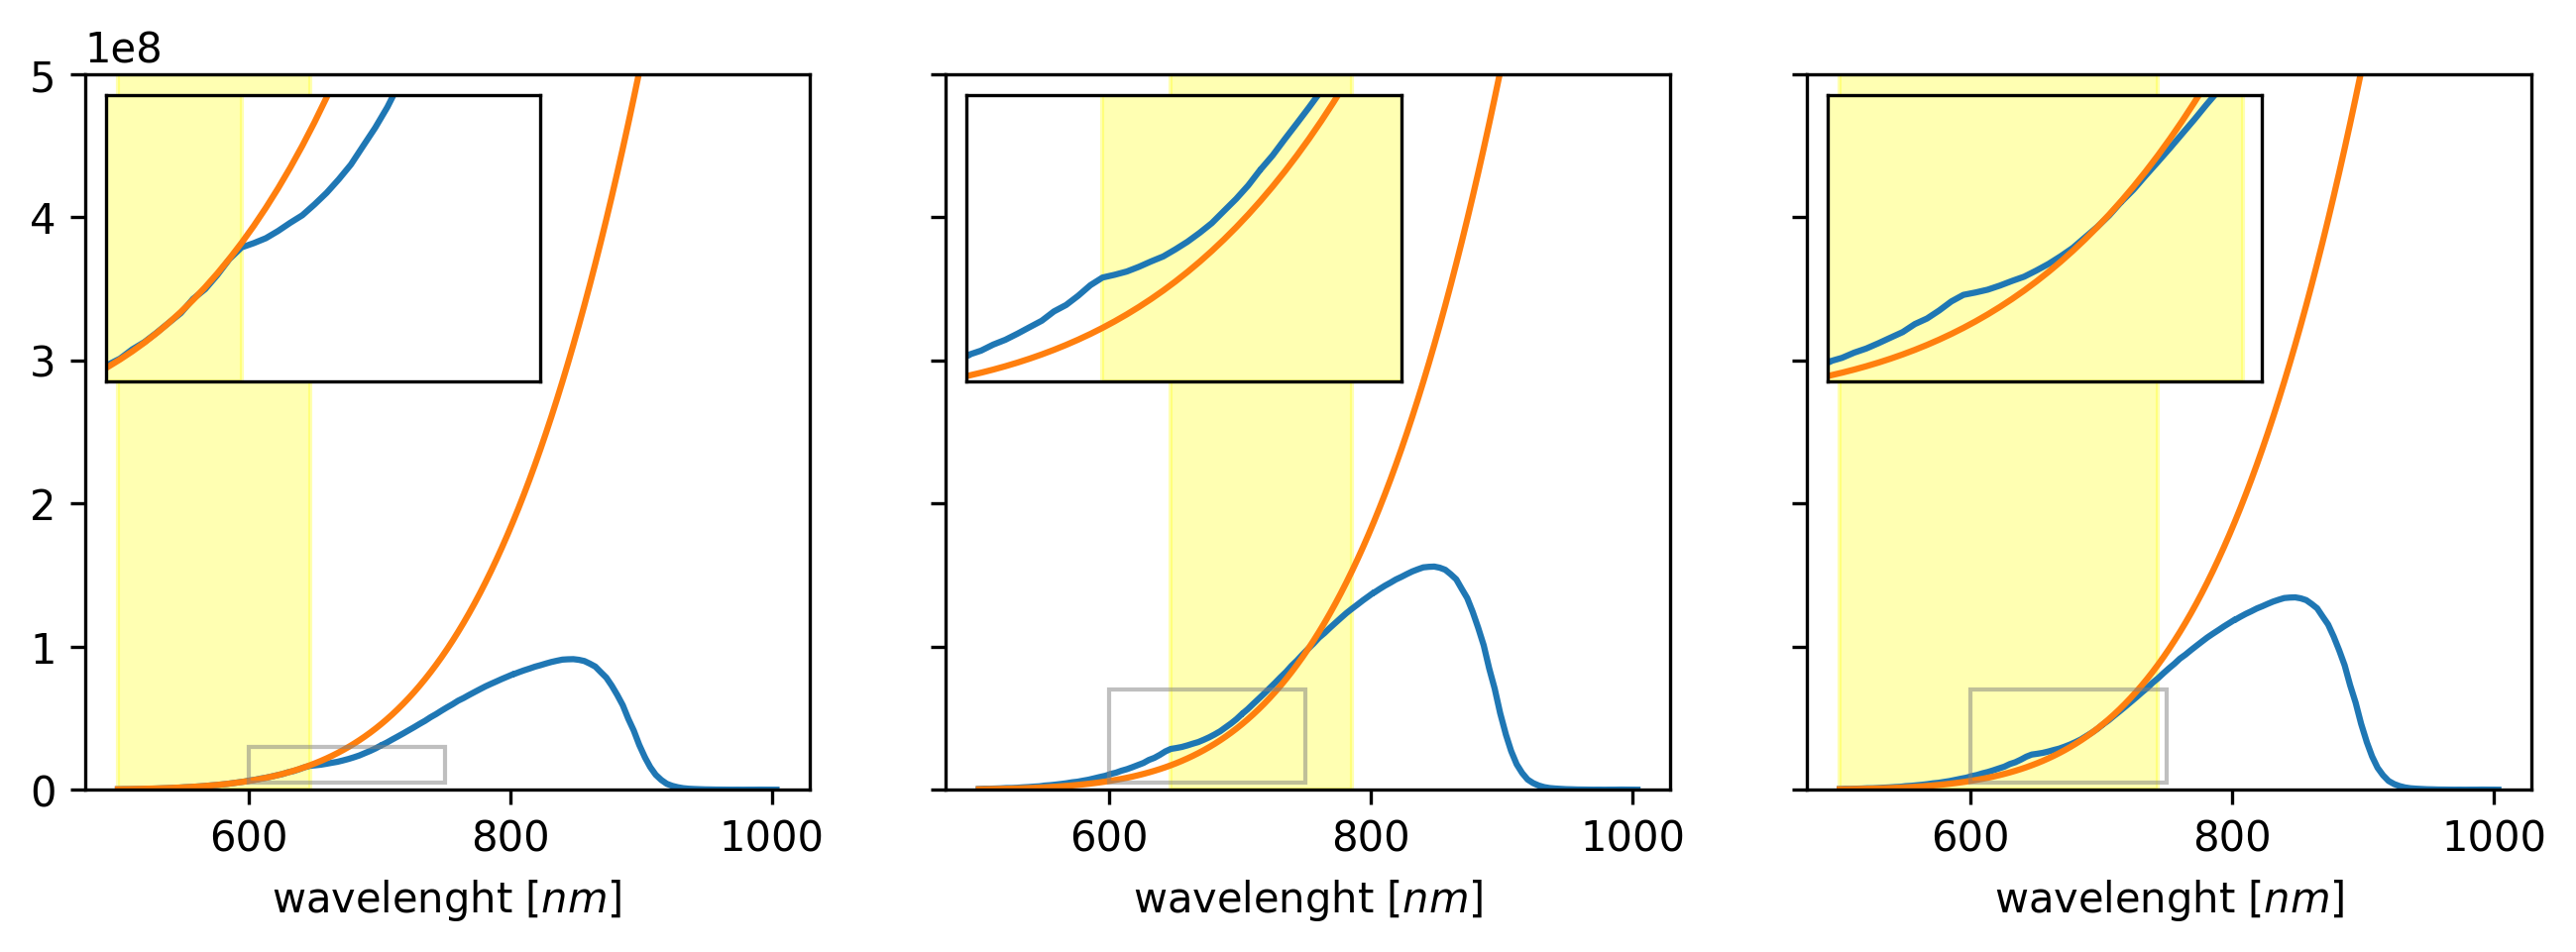

In [3]:
# this function multypiles x by a
fit = lambda x, a :  a * x


fig, axs = plt.subplots(1,3, sharey='row', figsize=(9,3), dpi=300)
plt.tight_layout()
for ax in axs.flatten():
    ax.set(xlabel = r'wavelenght $[nm]$')

arr_start = [0, 36, 0]
arr_stop =  [36, 70, 60]
arr_zoom = [[.05e8, .3e8 ], 
            [.05e8, .7e8 ], 
            [.05e8, .7e8 ]]

for start, stop, zoom, ax in zip(arr_start, arr_stop, arr_zoom, axs.flatten()):
    # optimize the proportionality coeff
    try:
        popt, pcov = curve_fit(fit, mean[start:stop], theo[start:stop], p0=[1e11], bounds=(1e10, 1e12), method='trf')
    except RuntimeError as e:
        print(e)
    A = popt[0] 

    # plot
    
    ax.plot(wl * 1e9, mean * A)
    ax.plot(wl * 1e9, theo)
    ax.set(ylim=(0,.5e9))
    # color the fitted region
    ax.axvspan(wl[start] * 1e9, wl[stop] * 1e9, color='yellow', alpha=0.3, label='fitted data')

    # Define the area for the zoomed-in square (in data coordinates)
    x1, x2, y1, y2 = 600, 750, *zoom  # Adjust as needed

    # Add the inset zoomed-in plot
    ax_inset = inset_axes(ax, width="60%", height="40%", loc="upper left")  # Location and size of the inset
    ax_inset.plot(wl * 1e9, mean * A)
    ax_inset.plot(wl * 1e9, theo)
    ax_inset.set_xlim(x1, x2)
    ax_inset.set_ylim(y1, y2)
    ax_inset.set_xticks([])
    ax_inset.set_yticks([])
    ax_inset.axvspan(wl[start] * 1e9, wl[stop] * 1e9, color='yellow', alpha=0.3, label='fitted data')

    # Add a rectangle on the main plot to show the inset location
    ax.indicate_inset_zoom(ax_inset)

LinregressResult(slope=1.0558980621858112e-05, intercept=2.4427649202767045e-11, rvalue=0.4284654434809275, pvalue=0.0091297895337034, stderr=3.818764263309045e-06, intercept_stderr=2.191260046001314e-12)


[Text(0.5, 0, 'wavelenght $[nm]$')]

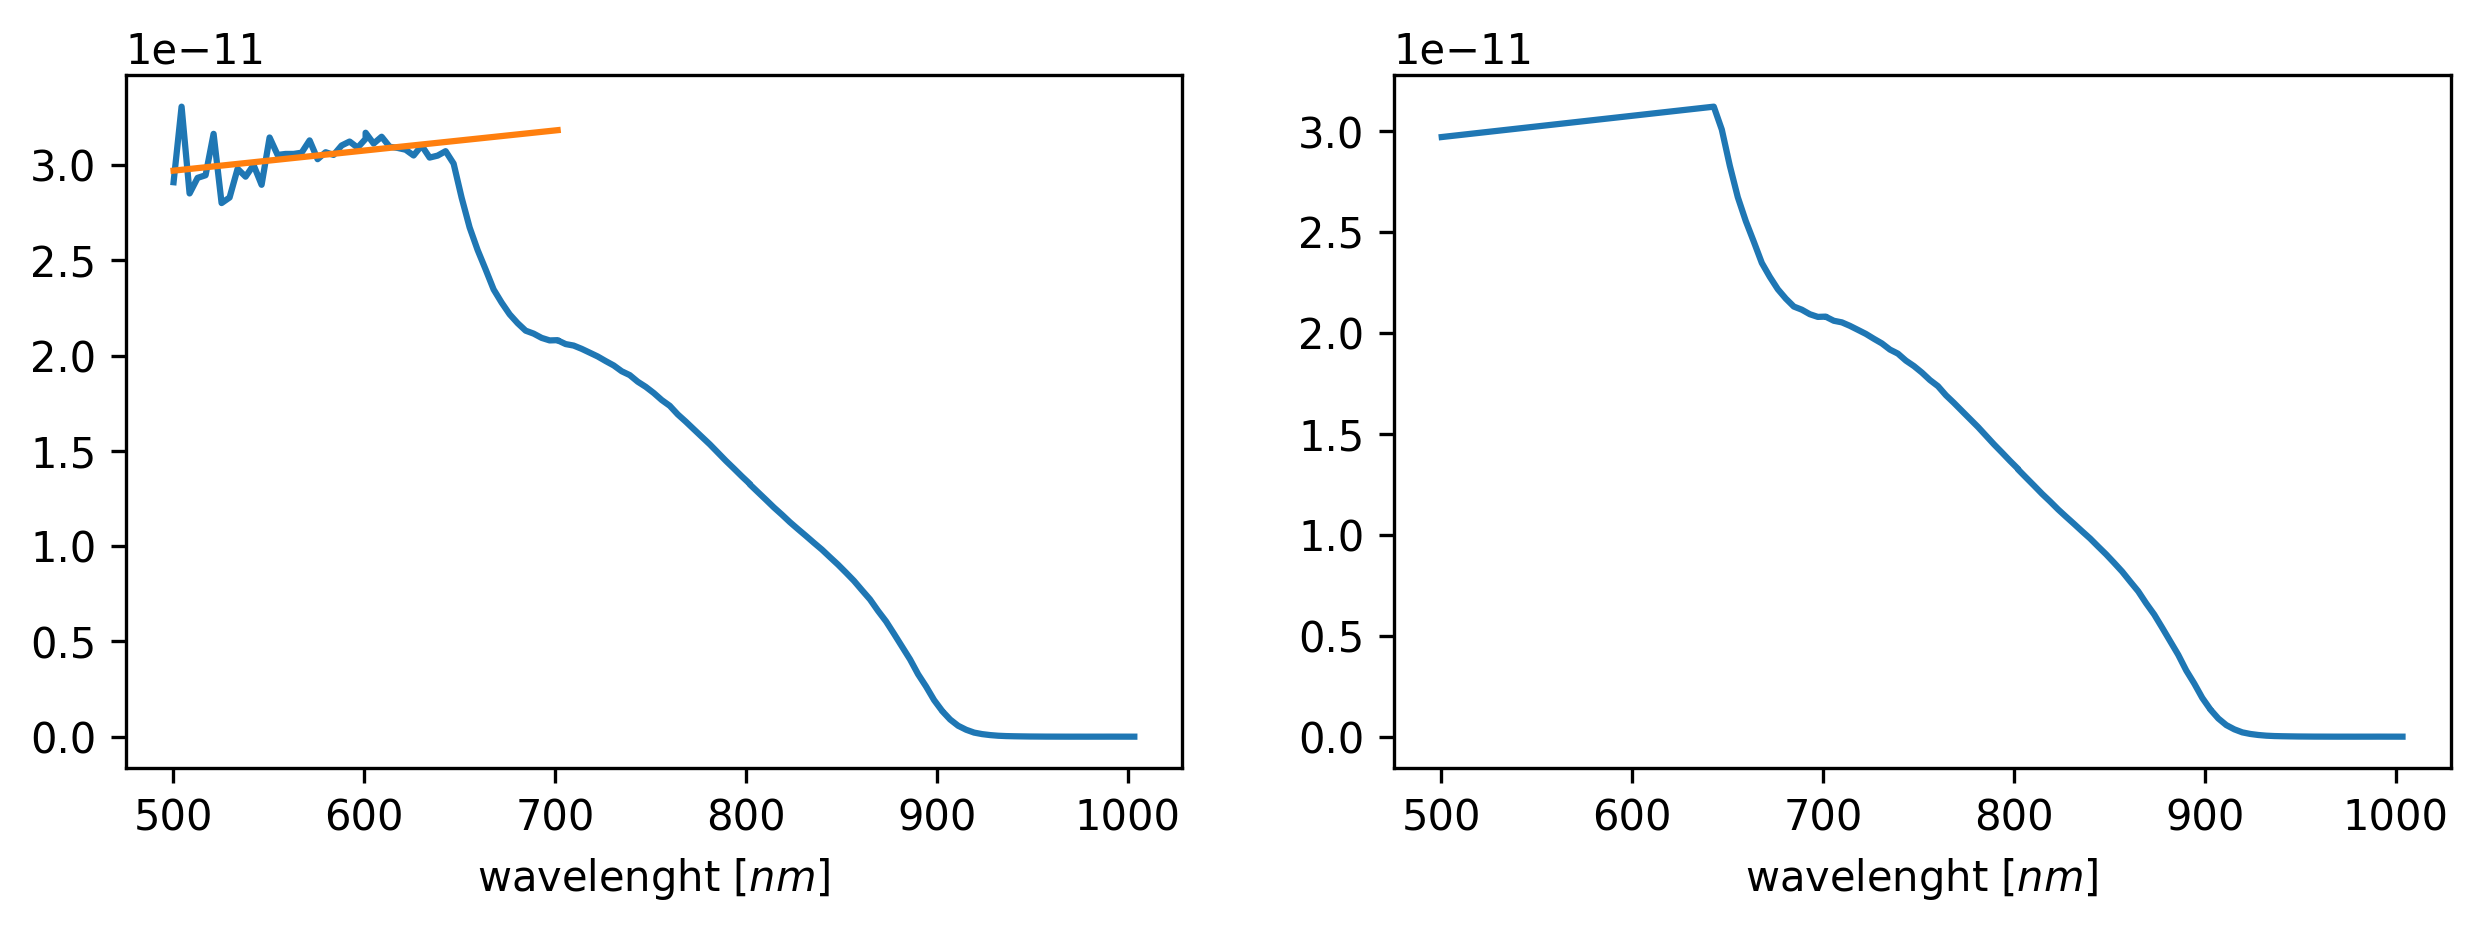

In [4]:
# responce function of the setup
responce = mean / theo

# linear fit of the responce function until
# the discontinuity point (knee) in the data
res = linregress(wl[:36], responce[:36])
print(res)

fig, axs = plt.subplots(1,2,figsize=(10,3), dpi=300)
axs = axs.flatten()
axs[0].plot(wl * 1e9, responce)
axs[0].plot(wl[:50] * 1e9, np.polyval(res[:2],wl[:50]))
axs[0].set(xlabel=r'wavelenght $[nm]$')

# update responce 
responce[:36] = np.polyval(res[:2],wl[:36])
axs[1].plot(wl * 1e9, responce)
axs[1].set(xlabel=r'wavelenght $[nm]$')

In [5]:

import utils
from importlib import reload
reload(utils)

Na_files = utils.getFiles('Na_spectrum\\29102024')

col_names = ['wl', 'mean', '1', '2', '3']
Na_Exp_df = utils.dfFormFiles(Na_files, 
                                     sep=r'    ',
                                     names=col_names,
                                     engine='python',
                                     dtype=np.float32)
Na_Exp_df

,wl,mean,1,2,3,meta
0,8175.000000,-7.420000e-06,-0.000008,-6.270000e-06,-8.070000e-06,Na_1000ms_780V__1tac_out1tac_in_307Hz_010_2910...
1,8175.200684,-7.350000e-06,-0.000008,-5.330000e-06,-8.980000e-06,Na_1000ms_780V__1tac_out1tac_in_307Hz_010_2910...
2,8175.403809,-6.330000e-06,-0.000006,-7.120000e-06,-5.700000e-06,Na_1000ms_780V__1tac_out1tac_in_307Hz_010_2910...
3,8175.604492,-5.160000e-06,-0.000005,-3.650000e-06,-6.920000e-06,Na_1000ms_780V__1tac_out1tac_in_307Hz_010_2910...
4,8175.805176,-6.100000e-06,-0.000005,-7.580000e-06,-5.760000e-06,Na_1000ms_780V__1tac_out1tac_in_307Hz_010_2910...
...,...,...,...,...,...,...
1275,5908.787109,-8.700000e-07,-0.000002,-3.000000e-07,-8.000000e-07,Na_300ms_630V__1tac_out0tac_in_307Hz_007_29102024
1276,5909.090332,-1.370000e-06,-0.000002,-1.300000e-06,-1.300000e-06,Na_300ms_630V__1tac_out0tac_in_307Hz_007_29102024
1277,5909.393555,-1.370000e-06,-0.000001,-1.300000e-06,-1.500000e-06,Na_300ms_630V__1tac_out0tac_in_307Hz_007_29102024
1278,5909.696777,-1.430000e-06,-0.000002,-1.500000e-06,-1.300000e-06,Na_300ms_630V__1tac_out0tac_in_307Hz_007_29102024


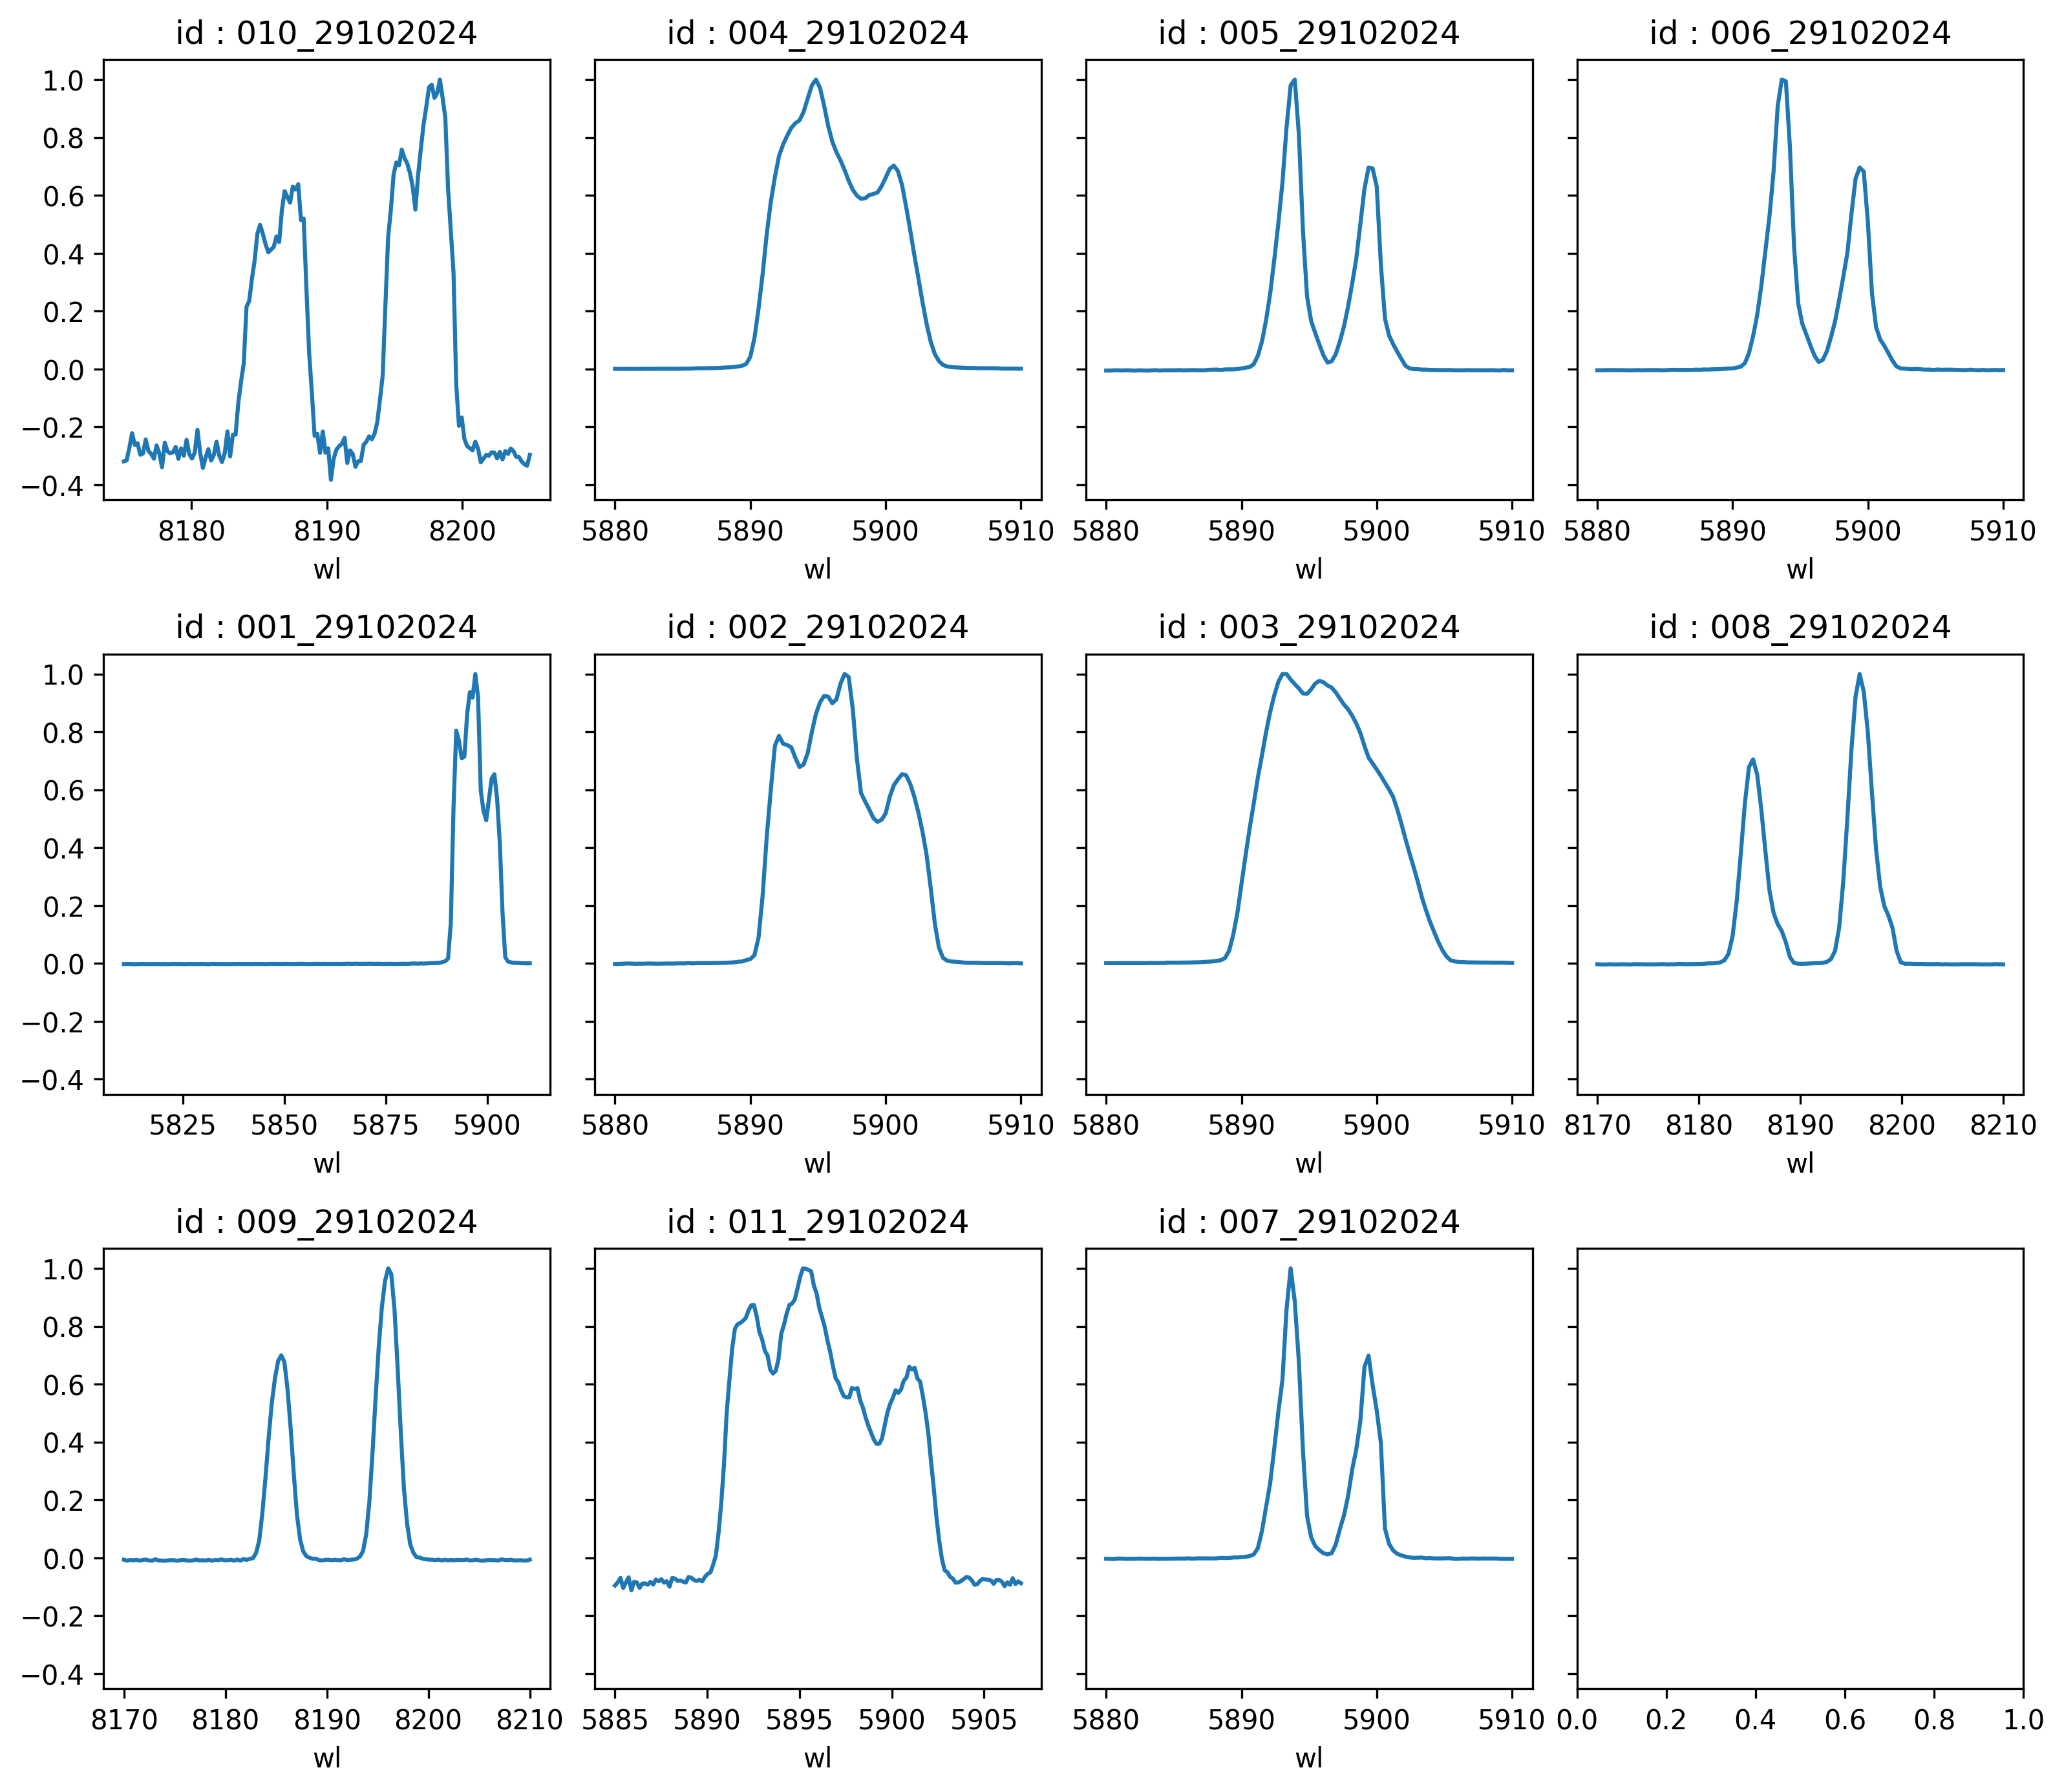

In [6]:
# add PTT photo tube tension
V = Na_Exp_df['meta']
V = [s.split('_')[2] for s in V]
Na_Exp_df['PTT'] = V
Na_Exp_df

fig, axs = plt.subplots(3, 4, figsize=(12, 10), dpi=300, sharey=True)
fig.subplots_adjust(wspace=0.10, right=0.95,
                    hspace=0.35, top=0.95)

groups = Na_Exp_df.groupby('meta')
for i, [name, group] in enumerate(groups):
    ax = axs.flatten()[i]
    group['mean'] = group['mean'] / group['mean'].max()
    group.plot('wl', 'mean', ax=ax)
    ax.set_title(f'id : {name[-12:]}')
    ax.get_legend().remove()

# Analisi statistcica
Si vuole utilizzare un'analisi Bayesiana per stimare i coefficienti della distribuzione da fittare ai dati. Dalla teoria ci aspettiamo che i picchi abbiamo una distribuzione lorenziana (distribuzione di Cauchy), della forma:
$$p(x \mid \mu, \gamma)=\frac{1}{\pi \gamma}\left(\frac{\gamma^2}{\gamma^2+(x-\mu)^2}\right),$$
dal momento che le code della distribuzione decrescono come $x^{-2}$ la media, varianza e i momenti di ordine suoperiore di questa distribuzione non sono definiti. Possimao invece stimare i parametri $\mu$ e $\gamma$ usando un approccio Bayesiano.
La probabilità di misurare un campione dati $\{x_i\}$ data la distribuzione di Cauchy è:
$$p\left(x_i \mid \mu, \gamma, I\right)=\prod_{i=1}^N \frac{1}{\pi}\left(\frac{\gamma}{\gamma^2+\left(x_i-\mu\right)^2}\right),$$
se provengono da una *somma* di $M$ distribuzioni di Cauchy allora:
$$p\left(x_i \mid \mu, \gamma, I\right)=\prod_{i=1}^N \sum_{j=1}^M \frac{1}{M}\frac{1}{\pi}\left(\frac{\gamma_j}{\gamma_j^2+\left(x_i-\mu_j\right)^2}\right),$$

In [8]:
from scipy.stats import cauchy
def cauchy_logL(xi, gamma, mu):
    """Equation 5.74: cauchy likelihood"""
    xi = np.asarray(xi)
    n = xi.size
    shape = np.broadcast(gamma, mu).shape

    xi = xi.reshape(xi.shape + tuple([1 for s in shape]))

    return ((n - 1) * np.log(gamma)
            - np.sum(np.log(gamma ** 2 + (xi - mu) ** 2), 0))

# Define the grid and compute logL
gamma = np.linspace(0.1, 5, 70)
mu = np.linspace(-5, 5, 70)

np.random.seed(44)
mu0 = 0
gamma0 = 2
xi = cauchy(mu0, gamma0).rvs(100)

logL = cauchy_logL(xi, gamma[:, np.newaxis], mu)
logL -= logL.max()

In [9]:
i, j = np.where(logL >= np.max(logL))

print("mu from likelihood:", mu[j])
print("gamma from likelihood:", gamma[i])
print()

mu from likelihood: [0.07246377]
gamma from likelihood: [2.23043478]



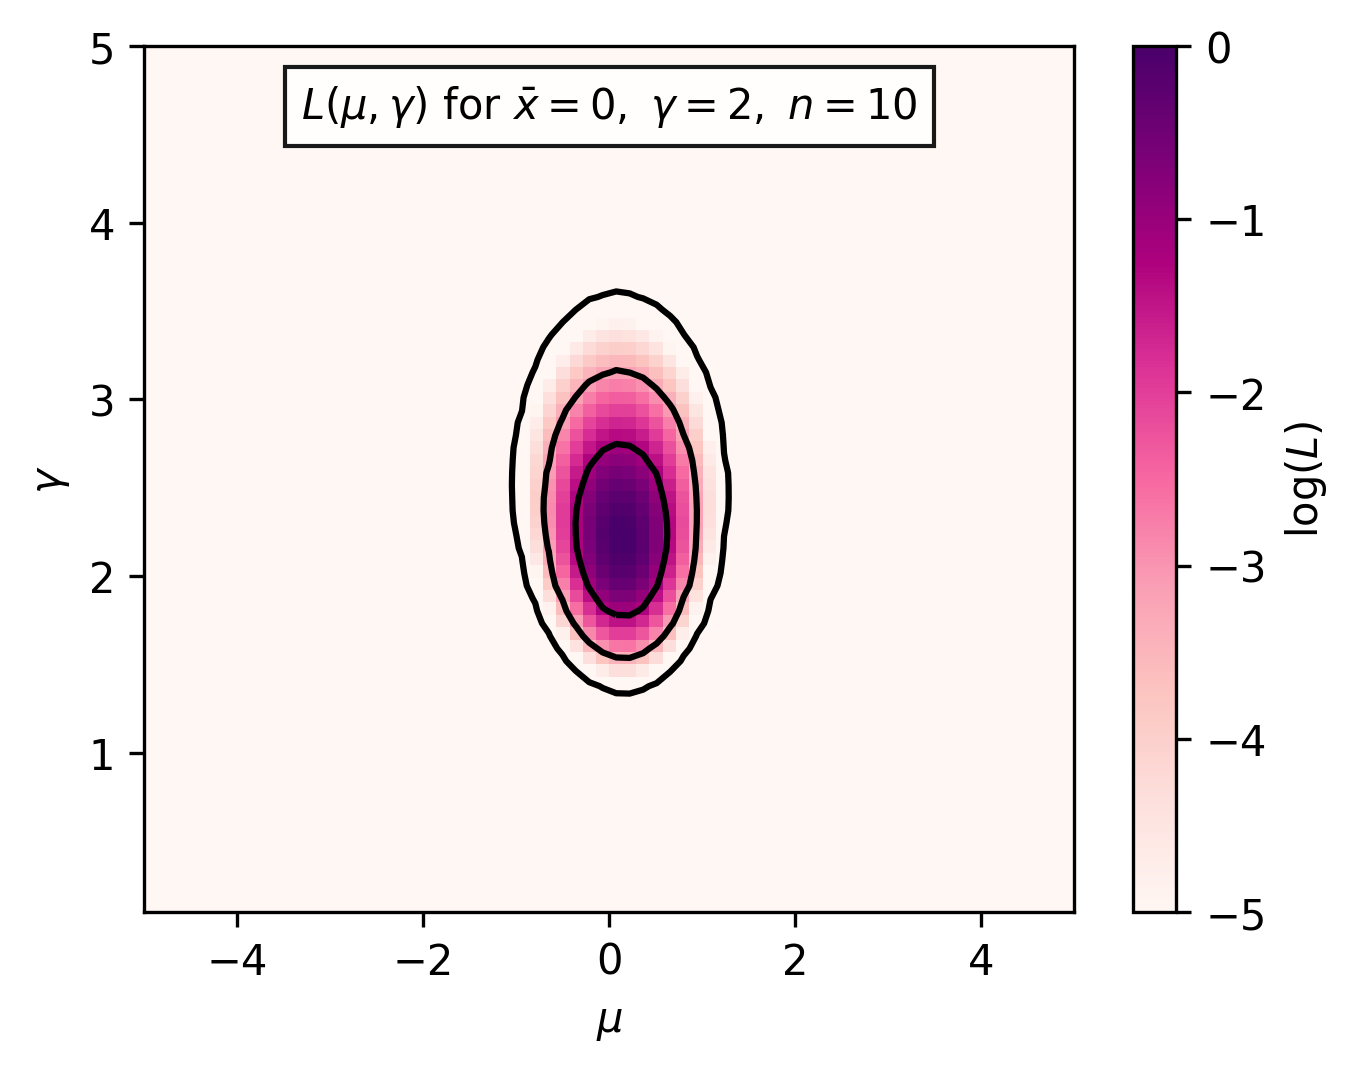

In [11]:
from astroML.plotting.mcmc import convert_to_stdev

fig = plt.figure(figsize=(5, 3.75), dpi=300)
plt.imshow(logL, origin='lower', cmap=plt.colormaps['RdPu'],
           extent=(mu[0], mu[-1], gamma[0], gamma[-1]),
           aspect='auto')
plt.colorbar().set_label(r'$\log(L)$')
plt.clim(-5, 0)

plt.contour(mu, gamma, convert_to_stdev(logL),
            levels=(0.683, 0.955, 0.997),
            colors='k')

plt.text(0.5, 0.93,
         r'$L(\mu,\gamma)\ \mathrm{for}\ \bar{x}=0,\ \gamma=2,\ n=10$',
         bbox=dict(ec='k', fc='w', alpha=0.9),
         ha='center', va='center', transform=plt.gca().transAxes)

plt.xlabel(r'$\mu$')
plt.ylabel(r'$\gamma$')

plt.show()

<Axes: xlabel='wl'>

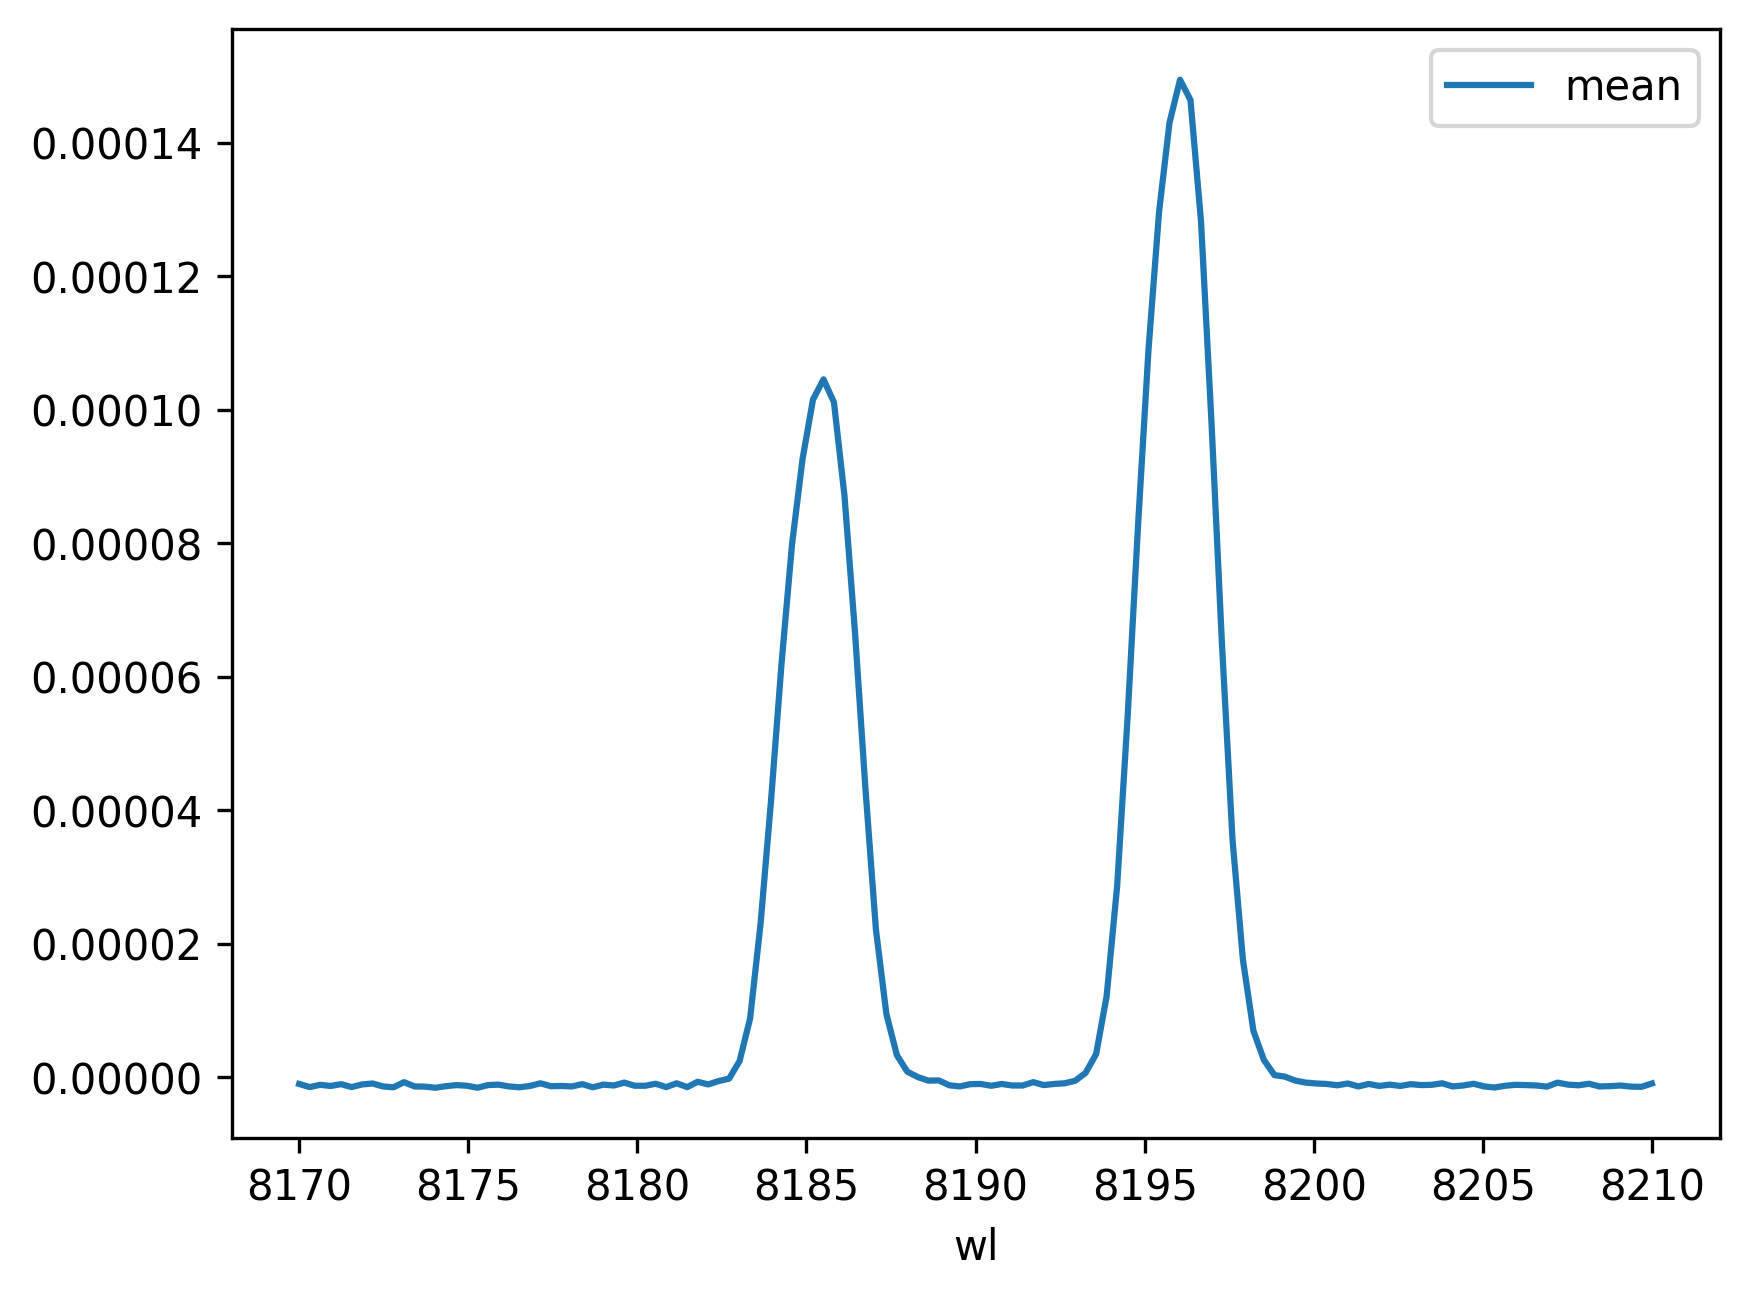

In [14]:
# extract the measure ids
Na_Exp_df['id'] = Na_Exp_df['meta'].apply( lambda x : x[-12:])

# fit of the measure 009_29102024
mydf = Na_Exp_df[Na_Exp_df['id'] == '009_29102024']
mydf.plot('wl', 'mean')

In [ ]:
def multi_cauchy_logL(xi, gamma, mu):
    '''Now gamma and mu can be an array'''
    xi = np.asarray(xi)
    n = xi.size
    shape = np.broadcast(gamma, mu).shape

    xi = xi.reshape(xi.shape + tuple([1 for s in shape]))

    return ((n - 1) * np.log(gamma)
            - np.sum(np.log(gamma ** 2 + (xi - mu) ** 2), 0))